In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Questão 1
### Parafusos Caixa

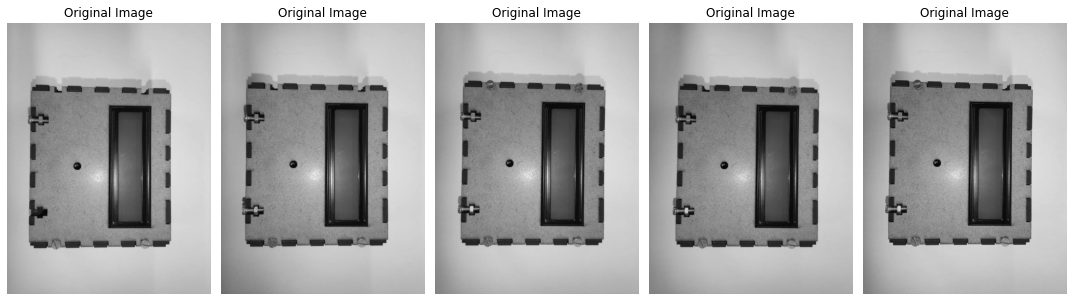

In [4]:
Fig1_caixa1 = cv2.imread("Figuras_APS3/Fig1_Caixa1.jpg", cv2.IMREAD_GRAYSCALE)
Fig1_caixa2 = cv2.imread("Figuras_APS3/Fig1_Caixa2.jpg", cv2.IMREAD_GRAYSCALE)
Fig1_caixa3 = cv2.imread("Figuras_APS3/Fig1_Caixa3.jpg", cv2.IMREAD_GRAYSCALE)
Fig1_caixa4 = cv2.imread("Figuras_APS3/Fig1_Caixa4.jpg", cv2.IMREAD_GRAYSCALE)
Fig1_caixa5 = cv2.imread("Figuras_APS3/Fig1_Caixa5.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(Fig1_caixa1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(Fig1_caixa2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(Fig1_caixa3, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(Fig1_caixa4, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(Fig1_caixa5, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

1040 780


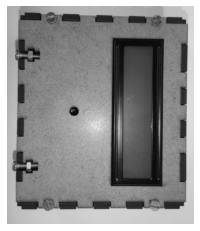

In [29]:

(h,w)=Fig1_caixa3.shape
print(h,w)
Fig1_caixa_Base = Fig1_caixa3[200:901,70:671]
plt.imshow(Fig1_caixa_Base, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
(m,n) = Fig1_caixa_Base.shape
(h,w) = Fig1_caixa1.shape
# print(m,n)
d2= int((n-1)/2)
d1= int((m-1)/2)

s_min =2000000000000000000000000000000000000000
i_min = 0
j_min = 0

img_Erros=np.ones((h,w),dtype = "int32")*s_min

for i in range(d1,h-d1):
    for j in range (d2,w-d2):
        secao_img = Fig1_caixa1[i-d1:i+d1+1,j-d2:j+d2+1]

        erro_secao = abs(secao_img.astype(np.int32)-Fig1_caixa_Base.astype(np.int32))
        img_Erros[i,j]=erro_secao.sum()
        if(img_Erros[i,j]<s_min):
            i_min=i
            j_min=j
            s_min=img_Erros[i,j]
print(i_min)
print(j_min)

561
353


In [ ]:
(h,w)=Fig1_caixa1.shape
print(h,w)
print(m,n)

Fig1_caixa1_cortada = Fig1_caixa1[int(i_min-((m-1)/2)):int(i_min+((m-1)/2))+1,int(j_min-((n-1)/2)):int(j_min+((n-1)/2))+1]


1040 780
701 601
211


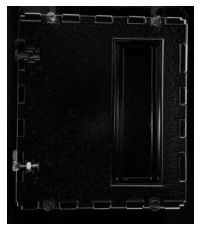

In [ ]:



# Fig1MinusFig3 =np.zeros((h,w),dtype = "uint8")
Fig1MinusFig3_32 =abs(Fig1_caixa_Base.astype(np.float32)-Fig1_caixa1_cortada.astype(np.float32))
Fig1MinusFig3 =np.clip(Fig1MinusFig3_32,0,255).astype(np.uint8)


plt.imshow(Fig1MinusFig3, cmap='gray')
plt.axis('off')
plt.show()

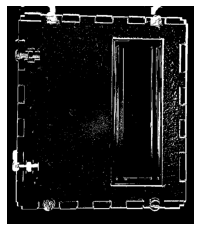

In [83]:
Fig1MinusFig3_bin = np.where(Fig1MinusFig3<30, 0, 255).astype(np.uint8)
plt.imshow(Fig1MinusFig3_bin, cmap='gray')
plt.axis('off')
plt.show()

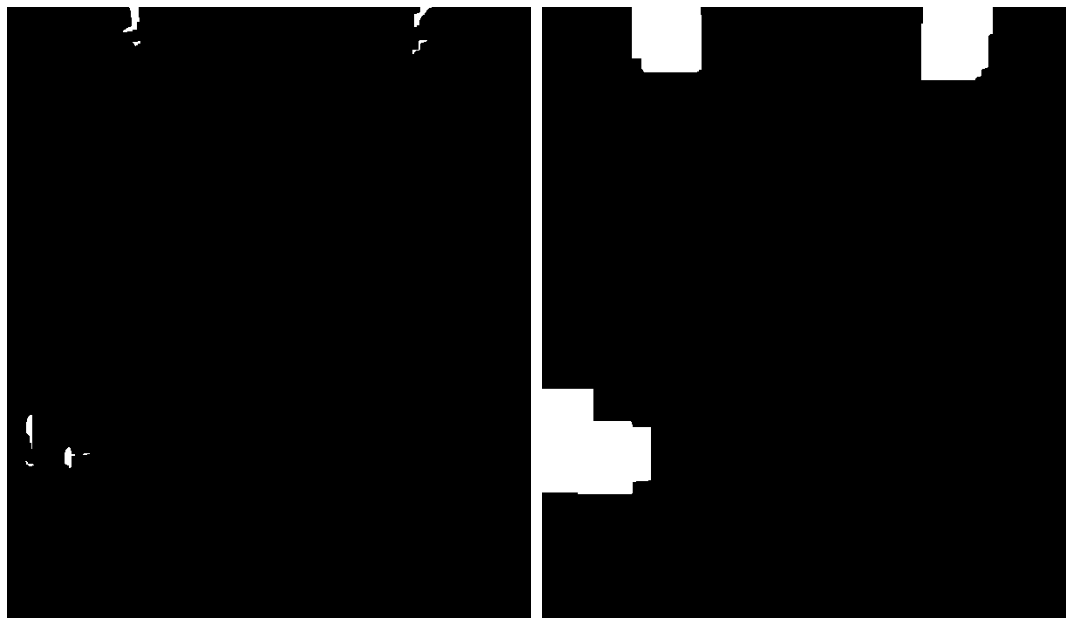

In [100]:
kernel1 = np.ones((9,9),np.uint8)
kernel2 = np.ones((7,7),np.uint8)
Fig1MinusFig3_eroded = cv2.erode(Fig1MinusFig3_bin,kernel1,iterations=1)
Fig1MinusFig3_eroded_dilated = cv2.dilate(Fig1MinusFig3_eroded,kernel2,iterations=10)

plt.figure(figsize=(15,20)) 

plt.subplot(1,2,1)
plt.imshow(Fig1MinusFig3_eroded, cmap='gray')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(Fig1MinusFig3_eroded_dilated, cmap='gray')
plt.axis('off')



plt.tight_layout()
plt.show()


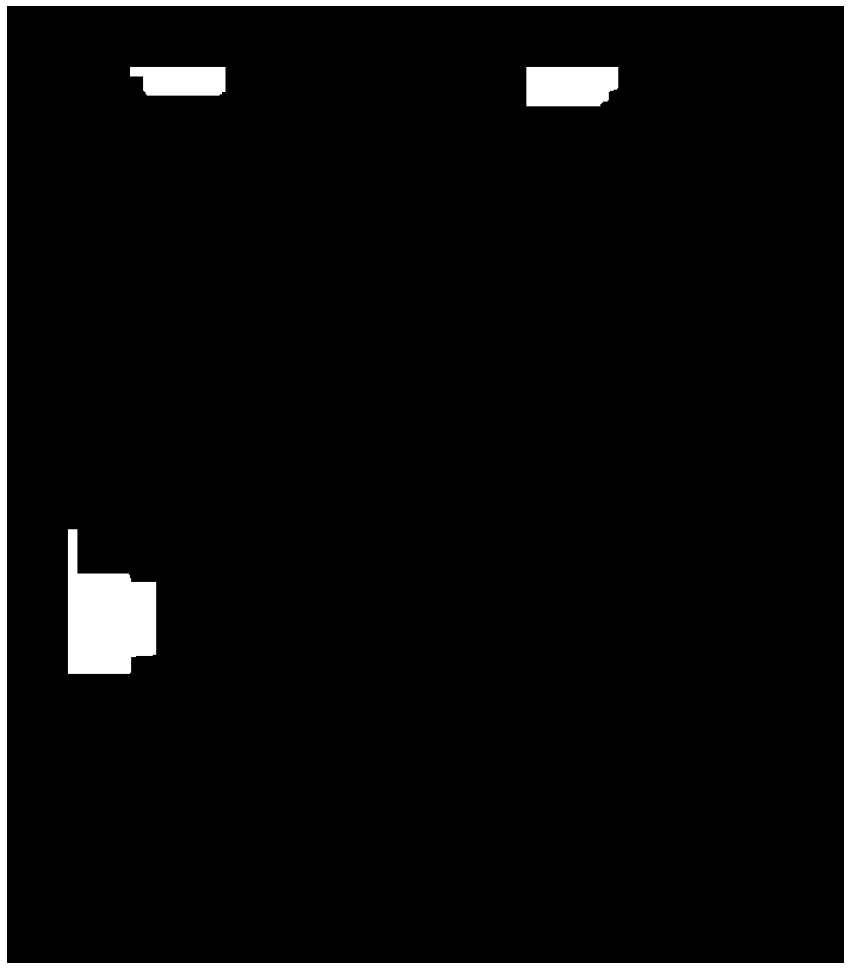

In [110]:
(h,w)=Fig1MinusFig3_eroded_dilated.shape
Fig1MinusFig3_final =np.zeros((h+100,w+100),dtype = "uint8")

for i in range(h):
    for j in range (w):
        if i>50 and j>50 and i<h+50 and j< w+50 :
            Fig1MinusFig3_final[i,j]= Fig1MinusFig3_eroded_dilated[i,j]
            
plt.figure(figsize=(15,20)) 
plt.imshow(Fig1MinusFig3_final, cmap='gray')
plt.axis('off')
plt.show()

In [111]:
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()
# Set blob color (0=black, 255=white)
params.filterByColor = True
params.blobColor = 255
# Filter by Area
params.filterByArea = False
# params.minArea = 1
# #params.maxArea = 20000
# Filter by Circularity
params.filterByCircularity = False
# params.minCircularity = 0.8
# #params.maxCircularity = 1.2
# Filter by Convexity
params.filterByConvexity = False
#params.minConvexity = 0.87
#params.maxConvexity = 1
# Filter by Inertia
params.filterByInertia = False
#params.minInertiaRatio = 0.01
#params.maxInertiaRatio = 1
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)
# Detect blobs
KP = detector.detect(Fig1MinusFig3_final)

Blob_ 1 : X=  83.9759750366211  Y=  512.9999389648438  size= 8109.936059124826  ang= -1.0
Blob_ 2 : X=  471.14544677734375  Y=  66.4223861694336  size= 3623.651543308064  ang= -1.0
Blob_ 3 : X=  146.05148315429688  Y=  62.01661682128906  size= 2985.464918782949  ang= -1.0


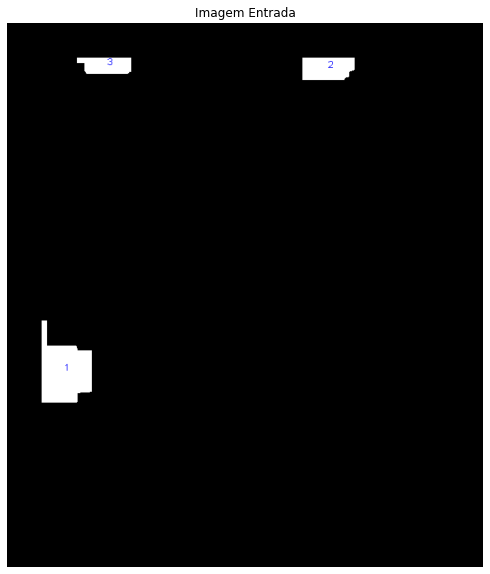

In [112]:
img1_text = cv2.cvtColor(Fig1MinusFig3_final,cv2.COLOR_GRAY2RGB)
i=1
for KPi in KP:
    print("Blob_", i, ": X= ", KPi.pt[0], " Y= ", KPi.pt[1], " size=", KPi.size**2, " ang=", KPi.angle)
    img1_text = cv2.putText(img1_text, str(i), (int(KPi.pt[0]),int(KPi.pt[1])), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255))
    i=i+1
#display image (with text)
plt.figure(figsize=(15,10)) 
plt.imshow(img1_text, cmap='gray')
plt.title('Imagem Entrada')
plt.axis('off')
plt.show()